### <u>**Objective:**</u>

Build different models and evaluate each one of them using different metrics.

In [1]:
## import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions_model import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
## Reading and printing csv file
df = pd.read_csv("FileModel.csv")
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Sleep Duration_encoded,Dietary Habits_encoded,Depression
0,Male,33,5,8.97,2,B.Pharm,Yes,3,1,No,Andhra Pradesh,1,2,1
1,Female,24,2,5.90,5,BSc,No,3,2,Yes,Karnataka,1,1,0
2,Male,31,3,7.03,5,BA,No,9,1,Yes,Jammu and Kashmir,0,2,0
3,Female,28,3,5.59,2,BCA,Yes,4,5,Yes,Uttar Pradesh,3,1,1
4,Female,25,4,8.13,3,M.Tech,Yes,1,1,No,Rajasthan,1,1,0


In [3]:
print(df.dtypes)

Gender                                    object
Age                                        int64
Academic Pressure                          int64
CGPA                                     float64
Study Satisfaction                         int64
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int64
Family History of Mental Illness          object
State                                     object
Sleep Duration_encoded                     int64
Dietary Habits_encoded                     int64
Depression                                 int64
dtype: object


### <u>**One Hot Encoding Columns**</u>

Columns need to be one hot encoded.

- Gender
- Degree
- Have you ever had suicidal thoughts
- Family History of Mental Illness
- State

In [4]:
df = one_hot_encode_column(df, 'Gender')
df = one_hot_encode_column(df, 'Degree')
df = one_hot_encode_column(df, 'Have you ever had suicidal thoughts ?')
df = one_hot_encode_column(df, 'Family History of Mental Illness')
df = one_hot_encode_column(df, 'State')

df.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Sleep Duration_encoded,Dietary Habits_encoded,Depression,Gender_Female,...,State_Jammu and Kashmir,State_Karnataka,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_West Bengal
0,33,5,8.97,2,3,1,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,24,2,5.90,5,3,2,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,31,3,7.03,5,9,1,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
3,28,3,5.59,2,4,5,3,1,1,1,...,0,0,0,0,0,0,0,0,1,0
4,25,4,8.13,3,1,1,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
## checking all the datatypes after one hot encoding
print(df.dtypes)

Age                                            int64
Academic Pressure                              int64
CGPA                                         float64
Study Satisfaction                             int64
Work/Study Hours                               int64
Financial Stress                               int64
Sleep Duration_encoded                         int64
Dietary Habits_encoded                         int64
Depression                                     int64
Gender_Female                                  int64
Gender_Male                                    int64
Degree_'Class 12'                              int64
Degree_B.Arch                                  int64
Degree_B.Com                                   int64
Degree_B.Ed                                    int64
Degree_B.Pharm                                 int64
Degree_B.Tech                                  int64
Degree_BA                                      int64
Degree_BBA                                    

### <u>**Models to be used:**</u>

- Logistic Regression
- Decision Tree
- Random Forest
- SVM

### Baseline Model

Constructing a baseline model, using Logistic Regression because we have binary target variable.

### <u>**Logistic Regression**</u>

Metric,Value
Accuracy,0.8432
Precision,0.8469
Recall,0.8930
F1 Score,0.8694


              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2316
           1       0.85      0.89      0.87      3253

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.84      5569
weighted avg       0.84      0.84      0.84      5569



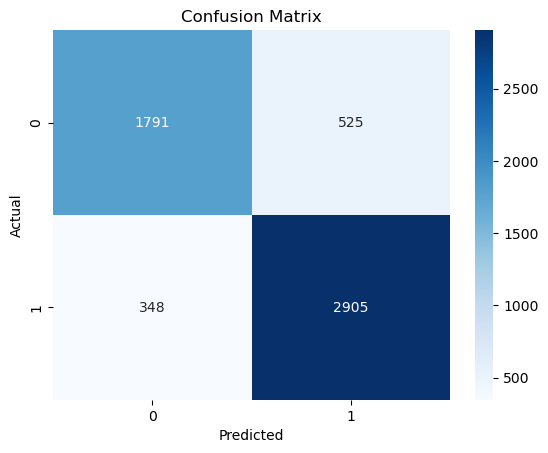

In [6]:
X = df.drop("Depression", axis=1)
y = df["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model1 = LogisticRegression()

model_evaulate(model1, X_train_scaled, y_train, X_test_scaled, y_test)



### <u>**Decision Tree**</u>

In [7]:
from sklearn.tree import DecisionTreeClassifier

Metric,Value
Accuracy,0.7716
Precision,0.8015
Recall,0.8094
F1 Score,0.8054


              precision    recall  f1-score   support

           0       0.73      0.72      0.72      2316
           1       0.80      0.81      0.81      3253

    accuracy                           0.77      5569
   macro avg       0.77      0.76      0.76      5569
weighted avg       0.77      0.77      0.77      5569



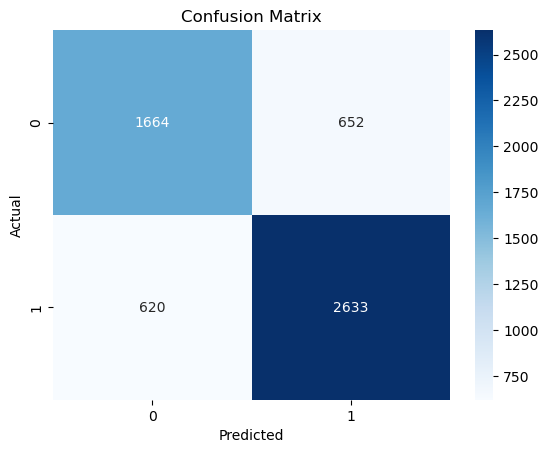

In [8]:
model2 = DecisionTreeClassifier(criterion= 'gini', random_state=42)
model_evaulate(model2, X_train, y_train, X_test, y_test)

### <u>**Random Forest**</u>

Metric,Value
Accuracy,0.8438
Precision,0.8485
Recall,0.8918
F1 Score,0.8696


              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2316
           1       0.85      0.89      0.87      3253

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.84      5569
weighted avg       0.84      0.84      0.84      5569



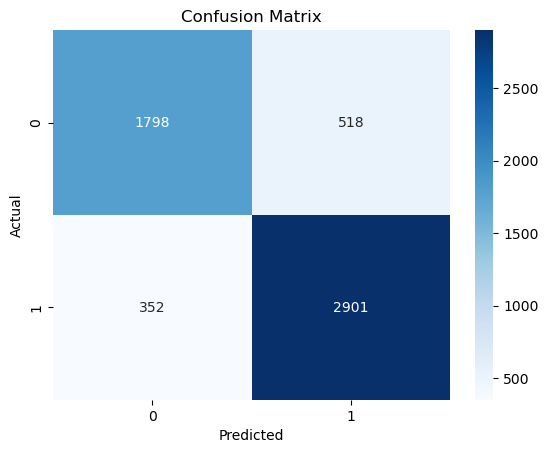

In [9]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=42)
model_evaulate(model3, X_train, y_train, X_test, y_test)

### **Hyperparameter Tuning for Random Forest**

In [ ]:


RFC = RandomForestClassifier()

params = {
    'n_estimators': [100, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 0.8],
    'bootstrap': [True],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}
 
 ## Using GridSearch
grid_search = GridSearchCV(
    estimator=RFC,
    param_grid=params,
    cv=5,
    scoring='recall',   
    n_jobs=-1,
    verbose=2
)




Finding the best model using best.estimator_ function

- Note: Uncomment the line below to see the best hyperparameters

In [12]:
##model_evaulate(grid_search, X_train, y_train, X_test, y_test)

### <u>**Cross Validation:**</u>

Cross Validating the data. Trying to improve recall.

In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
RF = RandomForestClassifier(class_weight='balanced', max_depth=30, n_estimators=300)
best_RF_cv = cross_val_score(RF, X_train, y_train, cv=cv, scoring='recall')             ## using recall 
print(f"Fold Metrics:\n{best_RF_cv}\n")
print(f"Average Score:\n{best_RF_cv.mean()}\n")                                         ## Average Score of Recall


Fold Metrics:
[0.88995399 0.88113497 0.89033742 0.87423313 0.88190184]

Average Score:
0.8835122699386504




 Fold 1 Recall: 0.8776
Confusion Matrix:
[[1853  457]
 [ 399 2860]]


Metric,Value
Accuracy,0.8463
Precision,0.8622
Recall,0.8776
F1 Score,0.8698


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2310
           1       0.86      0.88      0.87      3259

    accuracy                           0.85      5569
   macro avg       0.84      0.84      0.84      5569
weighted avg       0.85      0.85      0.85      5569



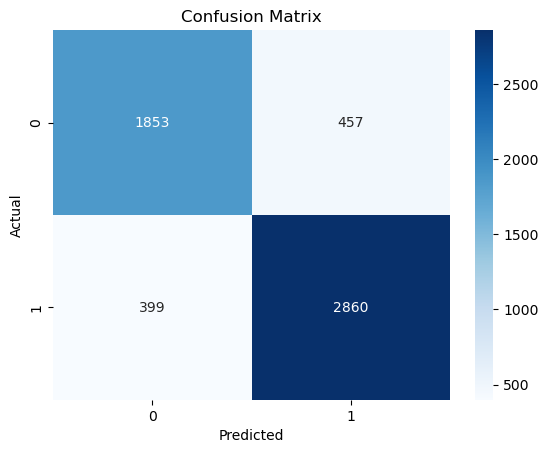


 Fold 2 Recall: 0.8825
Confusion Matrix:
[[1818  492]
 [ 383 2876]]


Metric,Value
Accuracy,0.8429
Precision,0.8539
Recall,0.8825
F1 Score,0.8680


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2310
           1       0.85      0.88      0.87      3259

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.84      5569
weighted avg       0.84      0.84      0.84      5569



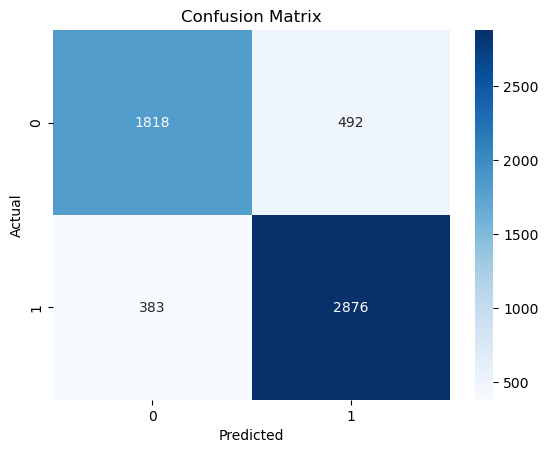


 Fold 3 Recall: 0.8699
Confusion Matrix:
[[1808  502]
 [ 424 2835]]


Metric,Value
Accuracy,0.8337
Precision,0.8496
Recall,0.8699
F1 Score,0.8596


              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2310
           1       0.85      0.87      0.86      3259

    accuracy                           0.83      5569
   macro avg       0.83      0.83      0.83      5569
weighted avg       0.83      0.83      0.83      5569



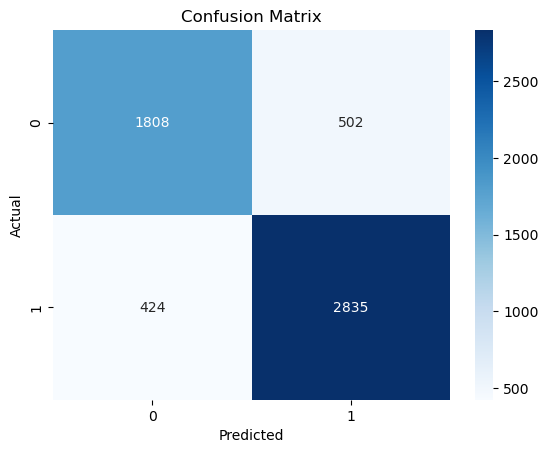


 Fold 4 Recall: 0.8864
Confusion Matrix:
[[1808  503]
 [ 370 2888]]


Metric,Value
Accuracy,0.8432
Precision,0.8517
Recall,0.8864
F1 Score,0.8687


              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2311
           1       0.85      0.89      0.87      3258

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.84      5569
weighted avg       0.84      0.84      0.84      5569



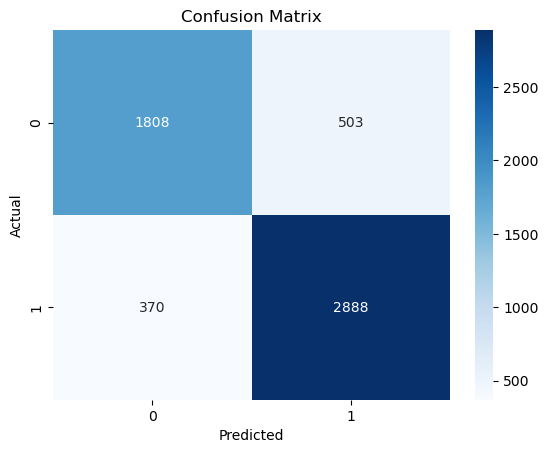


 Fold 5 Recall: 0.8849
Confusion Matrix:
[[1814  497]
 [ 375 2883]]


Metric,Value
Accuracy,0.8434
Precision,0.8530
Recall,0.8849
F1 Score,0.8686


              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2311
           1       0.85      0.88      0.87      3258

    accuracy                           0.84      5569
   macro avg       0.84      0.83      0.84      5569
weighted avg       0.84      0.84      0.84      5569



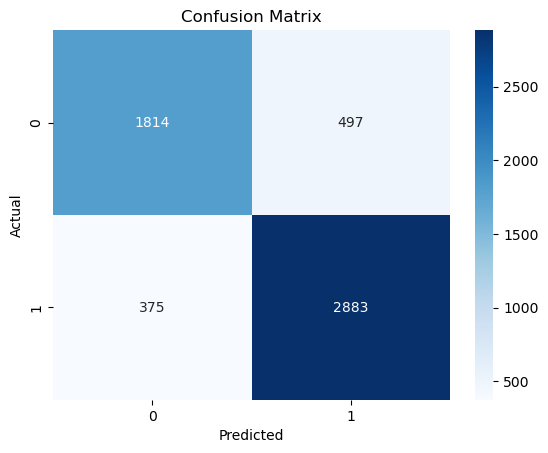


 Cross-Validation Summary
All Fold Recalls: [0.8775698066891685, 0.8824792881251918, 0.869898741945382, 0.8864333947206875, 0.8848987108655617]
Mean Recall: 0.8803
Best Fold Recall: 0.8864
Best Confusion Matrix:
[[1808  503]
 [ 370 2888]]


In [ ]:
## Printing each iteration, since the dataset was split into 5 parts
crossval_evaluate(RF, X, y)